<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Ionosphere_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import  to_categorical
from sklearn.preprocessing import scale, LabelEncoder

In [134]:
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/ionosphere_data.csv")
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [135]:
# Checking For Null Values
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

### OUR DATA CONTAINS NO NULL VALUES

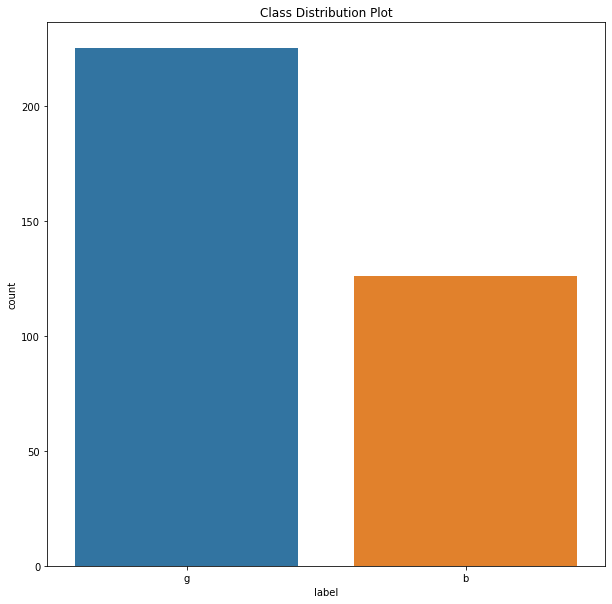

In [140]:
plt.figure(figsize=(10,10))
plt.title("Class Distribution Plot")
sns.countplot(x='label', data=df)

The Dataset Is Imbalance But It's Not Too Much So, I Am Going To Ignore It.

In [145]:
# Droping Unecessary Columns
df = df.drop('feature2', axis=1)

In [142]:
# One Hot Enconding Labels
encoding = {'g': 1, 'b': 0}
df.label.replace(encoding, inplace=True)

In [146]:
# Shuffling Data
df = df.sample(frac = 1)
df

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
46,1,1.00000,-0.03730,1.00000,-0.07383,0.99601,-0.11039,0.99838,-0.09931,0.98941,-0.13814,0.96674,-0.21695,0.95288,-0.25099,0.91236,-0.34400,0.90581,-0.32152,0.89991,-0.34691,0.87874,-0.37643,0.86213,-0.42990,0.83172,-0.43122,0.81433,-0.42593,0.77919,-0.47977,0.75115,-0.50152,1
229,1,0.73523,-0.38293,0.80151,0.10278,0.78826,0.15266,0.55580,0.05252,1.00000,0.21225,0.71947,0.28954,0.68798,0.32925,0.49672,0.17287,0.64333,-0.02845,0.57399,0.42528,0.53120,0.44872,0.94530,0.57549,0.44174,0.48200,0.12473,1.00000,0.35070,0.49721,0.30588,0.49831,1
9,1,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0
296,1,0.88116,0.27475,0.72125,0.42881,0.61559,0.63662,0.38825,0.90502,0.09831,0.96128,-0.20097,0.89200,-0.35737,0.77500,-0.65114,0.62210,-0.78768,0.45535,-0.81856,0.19095,-0.83943,-0.08079,-0.78334,-0.26356,-0.67557,-0.45511,-0.54732,-0.60858,-0.30512,-0.66700,-0.19312,-0.75597,1
339,1,0.65845,0.43617,0.44681,0.74804,0.05319,0.85106,-0.32027,0.82139,-0.68253,0.52408,-0.84211,0.07111,-0.82811,-0.28723,-0.47032,-0.71725,-0.04759,-0.86002,0.23292,-0.76316,0.56663,-0.52128,0.74300,-0.18645,0.74758,0.23713,0.45185,0.59071,0.20549,0.76764,-0.18533,0.74356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,0.43636,-0.12727,0.58182,-0.14545,0.18182,-0.67273,0.34545,-0.03636,0.29091,-0.05455,0.29091,0.29091,0.36364,-0.41818,0.20000,-0.01818,0.36364,0.05455,0.12727,0.49091,0.61818,0.16364,0.32727,0.16364,0.41098,-0.07027,0.34545,-0.05455,0.12727,-0.36364,0.29091,-0.29091,0
19,0,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,-1.00000,-0.71875,1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,0.56250,-1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,0
247,1,0.49870,0.01818,0.43117,-0.09610,0.50649,-0.04156,0.50130,0.09610,0.44675,0.05974,0.55844,-0.11948,0.51688,-0.03636,0.52727,-0.05974,0.55325,-0.01039,0.48571,-0.03377,0.49091,-0.01039,0.59221,0.00000,0.53215,-0.03280,0.43117,0.03377,0.54545,-0.05455,0.58961,-0.08571,1
292,1,0.84713,-0.03397,0.86412,-0.08493,0.81953,0.00000,0.73673,-0.07643,0.71975,-0.13588,0.74947,-0.11677,0.77495,-0.18684,0.78132,-0.21231,0.61996,-0.10191,0.79193,-0.15711,0.89384,-0.03397,0.84926,-0.26115,0.74115,-0.23312,0.66242,-0.22293,0.72611,-0.37792,0.65817,-0.24841,1


In [228]:
# Splitting The Dataset Into Training And Testing Data

# Training Data
train_data = df.iloc[:211,:]
train_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
46,1,1.00000,-0.03730,1.00000,-0.07383,0.99601,-0.11039,0.99838,-0.09931,0.98941,-0.13814,0.96674,-0.21695,0.95288,-0.25099,0.91236,-0.34400,0.90581,-0.32152,0.89991,-0.34691,0.87874,-0.37643,0.86213,-0.42990,0.83172,-0.43122,0.81433,-0.42593,0.77919,-0.47977,0.75115,-0.50152,1
229,1,0.73523,-0.38293,0.80151,0.10278,0.78826,0.15266,0.55580,0.05252,1.00000,0.21225,0.71947,0.28954,0.68798,0.32925,0.49672,0.17287,0.64333,-0.02845,0.57399,0.42528,0.53120,0.44872,0.94530,0.57549,0.44174,0.48200,0.12473,1.00000,0.35070,0.49721,0.30588,0.49831,1
9,1,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0
296,1,0.88116,0.27475,0.72125,0.42881,0.61559,0.63662,0.38825,0.90502,0.09831,0.96128,-0.20097,0.89200,-0.35737,0.77500,-0.65114,0.62210,-0.78768,0.45535,-0.81856,0.19095,-0.83943,-0.08079,-0.78334,-0.26356,-0.67557,-0.45511,-0.54732,-0.60858,-0.30512,-0.66700,-0.19312,-0.75597,1
339,1,0.65845,0.43617,0.44681,0.74804,0.05319,0.85106,-0.32027,0.82139,-0.68253,0.52408,-0.84211,0.07111,-0.82811,-0.28723,-0.47032,-0.71725,-0.04759,-0.86002,0.23292,-0.76316,0.56663,-0.52128,0.74300,-0.18645,0.74758,0.23713,0.45185,0.59071,0.20549,0.76764,-0.18533,0.74356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0.74790,0.00840,0.83312,0.01659,0.82638,0.02469,0.86555,0.01681,0.60504,0.05882,0.79093,0.04731,0.77441,0.05407,0.64706,0.19328,0.84034,0.04202,0.71285,0.07122,0.68895,0.07577,0.66387,0.08403,0.63728,0.08296,0.61345,0.01681,0.58187,0.08757,0.55330,0.08891,1
140,1,0.94531,-0.03516,-1.00000,-0.33203,-1.00000,-0.01563,0.97266,0.01172,0.93359,-0.01953,-1.00000,0.16406,-1.00000,-0.00391,0.95313,-0.03516,0.92188,-0.02734,-0.99219,0.11719,-0.93359,0.34766,0.95703,-0.00391,0.82041,0.13758,0.90234,-0.06641,-1.00000,-0.18750,-1.00000,-0.34375,0
54,1,0.95659,0.08143,0.97487,-0.05667,0.97165,-0.08484,0.96097,-0.06561,0.94717,0.01279,0.95436,-0.16795,0.94612,-0.19497,0.99630,-0.32268,0.90343,-0.35902,0.91428,-0.27316,0.90140,-0.29807,0.99899,-0.40747,0.87244,-0.34586,0.92059,-0.30619,0.83951,-0.39061,0.82166,-0.41173,1
159,1,0.94333,0.38574,0.48263,0.64534,0.21572,0.77514,-0.55941,0.64899,-0.73675,0.42048,-0.76051,0.00000,-0.62706,-0.31079,-0.38391,-0.62157,-0.12797,-0.69287,0.49909,-0.63620,0.71481,-0.37660,0.73857,-0.05484,0.60098,0.30384,0.45521,0.60512,0.02742,0.54479,-0.21572,0.50457,1


In [229]:
# Testing Data
test_data = df.iloc[211:,:]
test_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
125,1,0.95217,0.06595,0.93614,0.13030,0.90996,0.19152,0.84881,-0.49962,0.90023,0.61320,0.77937,0.34328,0.72254,0.37988,0.66145,0.40844,0.95472,0.59862,0.53258,0.44088,0.46773,0.44511,0.40440,0.44199,0.34374,0.43221,0.90330,1.00000,0.23405,0.39620,0.18632,0.37191,1
317,1,1.00000,-0.24051,1.00000,-0.20253,0.87342,-0.10127,0.88608,0.01266,1.00000,0.11392,0.92405,0.06329,0.84810,-0.03797,0.63291,-0.36709,0.87342,-0.01266,0.93671,0.06329,1.00000,0.25316,0.62025,-0.37975,0.84637,-0.05540,1.00000,-0.06329,0.53165,0.02532,0.83544,-0.02532,1
18,1,0.67065,0.02528,0.66626,0.05031,0.57197,0.18761,0.08776,0.34081,0.63621,0.12131,0.62099,0.14285,0.78637,0.10976,0.58373,0.18151,0.14395,0.41224,0.53888,0.21326,0.51420,0.22625,0.48838,0.23724,0.46167,0.24618,0.43433,0.25306,0.40663,0.25792,1.00000,0.33036,1
101,1,1.00000,0.01709,0.96215,-0.03142,1.00000,-0.03436,1.00000,-0.05071,0.99026,-0.07092,0.99173,-0.09002,1.00000,-0.15727,1.00000,-0.14257,0.98310,-0.11813,1.00000,-0.18519,1.00000,-0.19272,0.98971,-0.22083,0.96490,-0.20243,0.94599,-0.17123,0.96436,-0.22561,0.87011,-0.23296,1
233,1,0.50466,-0.16900,0.71442,0.01513,0.71063,0.02258,0.68065,0.01282,0.34615,0.05594,0.69050,0.04393,0.68101,0.05058,0.67023,0.05692,0.63403,-0.04662,0.64503,0.06856,0.63077,0.07381,0.84033,0.18065,0.59935,0.08304,0.38228,0.06760,0.56466,0.09046,0.54632,0.09346,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,0.43636,-0.12727,0.58182,-0.14545,0.18182,-0.67273,0.34545,-0.03636,0.29091,-0.05455,0.29091,0.29091,0.36364,-0.41818,0.20000,-0.01818,0.36364,0.05455,0.12727,0.49091,0.61818,0.16364,0.32727,0.16364,0.41098,-0.07027,0.34545,-0.05455,0.12727,-0.36364,0.29091,-0.29091,0
19,0,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,-1.00000,-0.71875,1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,0.56250,-1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,0
247,1,0.49870,0.01818,0.43117,-0.09610,0.50649,-0.04156,0.50130,0.09610,0.44675,0.05974,0.55844,-0.11948,0.51688,-0.03636,0.52727,-0.05974,0.55325,-0.01039,0.48571,-0.03377,0.49091,-0.01039,0.59221,0.00000,0.53215,-0.03280,0.43117,0.03377,0.54545,-0.05455,0.58961,-0.08571,1
292,1,0.84713,-0.03397,0.86412,-0.08493,0.81953,0.00000,0.73673,-0.07643,0.71975,-0.13588,0.74947,-0.11677,0.77495,-0.18684,0.78132,-0.21231,0.61996,-0.10191,0.79193,-0.15711,0.89384,-0.03397,0.84926,-0.26115,0.74115,-0.23312,0.66242,-0.22293,0.72611,-0.37792,0.65817,-0.24841,1


In [230]:
# Dropping Labels From Training And Testing Data

# Train Labels
train_labels = train_data.pop('label')
train_labels

46     1
229    1
9      0
296    1
339    1
      ..
318    1
140    0
54     1
159    1
121    1
Name: label, Length: 211, dtype: int64

In [232]:
# Test Labels
test_labels = test_data.pop('label')
test_labels

125    1
317    1
18     1
101    1
233    1
      ..
120    0
19     0
247    1
292    1
198    0
Name: label, Length: 140, dtype: int64

In [153]:
# Standardizing Training And Testing Data
from sklearn.preprocessing import StandardScaler
train_data = StandardScaler().fit_transform(train_data)
train_data

array([[ 0.37488737,  0.68842263, -0.18176899, ..., -0.97403328,
         0.77483017, -1.10696325],
       [ 0.37488737,  0.15532241, -0.95682396, ...,  0.93397962,
        -0.06305654,  1.04907163],
       [ 0.37488737, -1.36255447, -0.28781404, ...,  0.43333569,
        -0.79310018,  0.79534944],
       ...,
       [ 0.37488737,  0.60101892,  0.08447606, ..., -0.79990645,
         0.90751235, -0.91333996],
       [ 0.37488737,  0.57432062,  0.76687335, ...,  1.02690194,
        -1.04457722,  1.06257071],
       [ 0.37488737,  0.68842263, -2.17133015, ...,  0.81045425,
         0.17795797, -0.26961099]])

In [154]:
test_data = StandardScaler().fit_transform(test_data)
test_data

array([[ 0.30618622,  0.67695017,  0.04770501, ...,  0.84802874,
        -0.35131064,  0.7463811 ],
       [ 0.30618622,  0.77329587, -0.66014236, ...,  0.12385079,
         0.92928119, -0.09252627],
       [ 0.30618622,  0.10987427, -0.04623271, ...,  0.57802408,
         1.25392716,  0.65863194],
       ...,
       [ 0.30618622, -0.23649083, -0.06263196, ..., -0.03210287,
         0.44430478, -0.2200635 ],
       [ 0.30618622,  0.46536431, -0.18308566, ..., -0.6635131 ,
         0.57956078, -0.56366854],
       [ 0.30618622, -0.49823367, -2.4143778 , ...,  0.07651992,
        -0.71858908, -0.03218948]])

In [155]:
n_features = train_data.shape[1]
n_features

33

In [234]:
# Making Base Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_features,)))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [235]:
# Compilation Step
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 16)                544       
_________________________________________________________________
dropout_32 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 12)                204       
_________________________________________________________________
dropout_33 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_34 (Dropout)         (None, 8)               

In [236]:
# Fitting Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 8)

Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.3830
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.6676
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6856
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6030
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.7073
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7114
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7647
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7723
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7596
Epoch 10/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.8253
Epoch 11/

In [237]:
# Feeding History In A DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.077012,0.990521,95
96,0.027379,0.995261,96
97,0.112045,0.966825,97
98,0.067419,0.985782,98
99,0.067885,0.985782,99


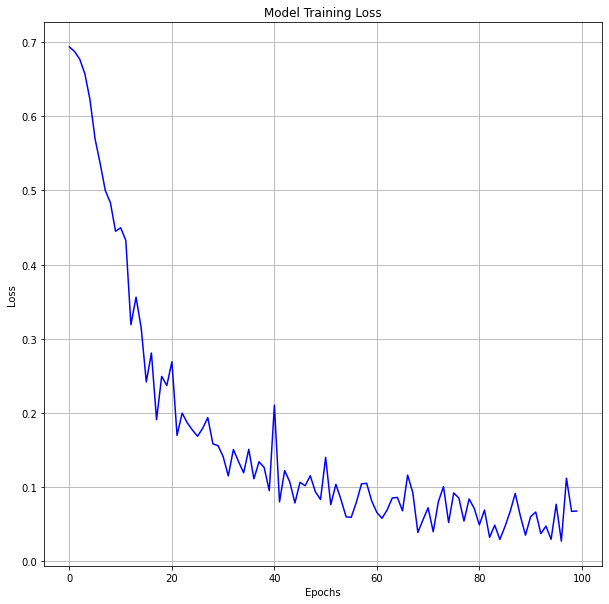

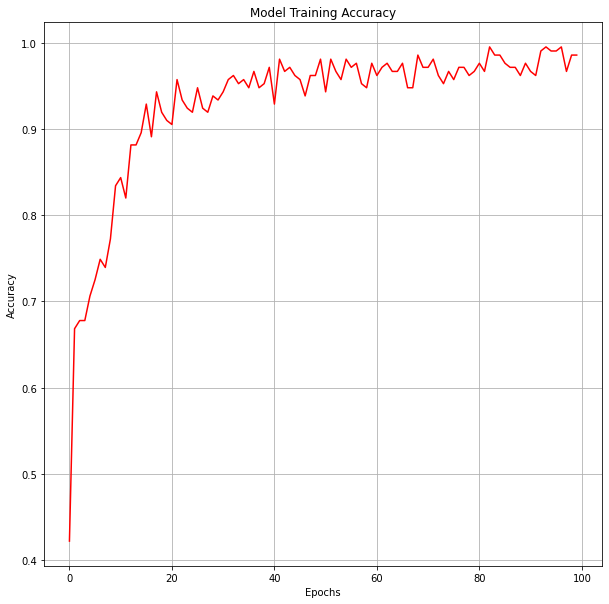

In [238]:
# Plotting Loss And Accuracy
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Loss")
plt.plot(history_df['epoch'], history_df['loss'], color = 'blue')
plt.grid()

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Training Accuracy")
plt.plot(history_df['epoch'], history_df['accuracy'], color = 'red')
plt.grid()
plt.show()

In [239]:
# Making Predictions On Test Data
predictions = model.predict(test_data)

In [240]:
predictions

array([[9.94915068e-01],
       [9.79391694e-01],
       [6.60410225e-02],
       [9.98434782e-01],
       [9.93180811e-01],
       [9.98086452e-01],
       [9.98720229e-01],
       [9.93204236e-01],
       [9.91379857e-01],
       [9.93800879e-01],
       [9.99875307e-01],
       [9.99491096e-01],
       [9.98244286e-01],
       [9.27179337e-01],
       [9.98990357e-01],
       [1.30029790e-13],
       [9.99974668e-01],
       [9.99510527e-01],
       [1.67278742e-07],
       [4.52339649e-04],
       [9.93866444e-01],
       [2.40780898e-27],
       [3.81089449e-01],
       [1.68979168e-04],
       [8.00291746e-25],
       [9.99811530e-01],
       [9.94657695e-01],
       [9.91408825e-01],
       [9.10319294e-24],
       [9.30499622e-10],
       [9.99868453e-01],
       [9.97757912e-01],
       [9.92475450e-01],
       [9.99128520e-01],
       [1.52364969e-02],
       [4.90671264e-05],
       [9.96032953e-01],
       [9.66575742e-01],
       [9.99822497e-01],
       [1.47074461e-03],


In [243]:
# Testing Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing

5/5 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9429


[0.23139308393001556, 0.9428571462631226]

In [244]:
print(f"Testing Loss: {testing[0]}")
print(f"Testing Accuracy: {testing[1]}")

Testing Loss: 0.23139308393001556
Testing Accuracy: 0.9428571462631226


In [242]:
from sklearn.metrics import classification_report
classification_report(test_labels, predictions.round(), output_dict=True)

{'0': {'f1-score': 0.9215686274509804,
  'precision': 0.9038461538461539,
  'recall': 0.94,
  'support': 50},
 '1': {'f1-score': 0.9550561797752809,
  'precision': 0.9659090909090909,
  'recall': 0.9444444444444444,
  'support': 90},
 'accuracy': 0.9428571428571428,
 'macro avg': {'f1-score': 0.9383124036131307,
  'precision': 0.9348776223776224,
  'recall': 0.9422222222222222,
  'support': 140},
 'weighted avg': {'f1-score': 0.9430963396594592,
  'precision': 0.9437437562437562,
  'recall': 0.9428571428571428,
  'support': 140}}

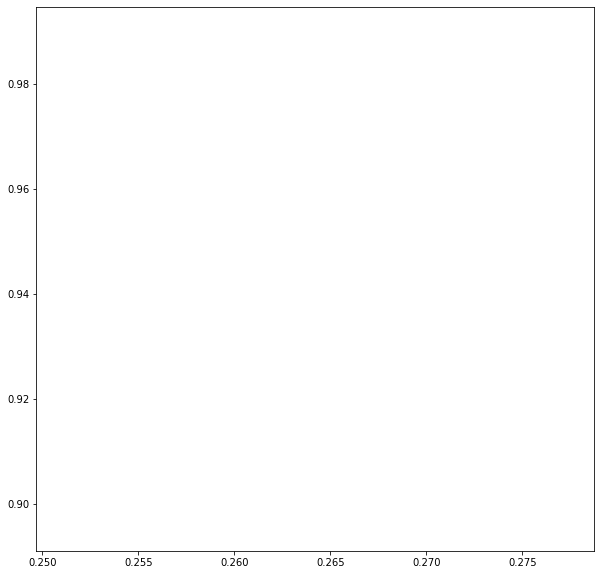

In [215]:
plt.figure(figsize=(10,10))
plt.plot(testing[0], testing[1])
plt.plotting